In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency

In [2]:
df = pd.read_csv("D:/assingment/kepler_data.csv")


In [3]:
df.head(10)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [5]:
df.isnull().sum()

kepid                   0
kepoi_name              0
kepler_name          7204
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

In [6]:
#null values
nullcols = df.isnull().sum()
nullcols[nullcols>0]

kepler_name          7204
koi_score            1510
koi_period_err1       454
koi_period_err2       454
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad              363
koi_srad_err1         468
koi_srad_err2         468
koi_kepmag              1
dtype: int64

## Missing value percentage 

In [142]:
feature_wit_nal = [feature for feature in df.columns if df [feature]. isnull().sum()>1]

for feature in feature_wit_nal:
    print(feature, np.round(df[feature].isnull().mean(),4),'% missing values')

kepler_name 0.7532 % missing values
koi_score 0.1579 % missing values
koi_period_err1 0.0475 % missing values
koi_period_err2 0.0475 % missing values
koi_time0bk_err1 0.0475 % missing values
koi_time0bk_err2 0.0475 % missing values
koi_impact 0.038 % missing values
koi_impact_err1 0.0475 % missing values
koi_impact_err2 0.0475 % missing values
koi_duration_err1 0.0475 % missing values
koi_duration_err2 0.0475 % missing values
koi_depth 0.038 % missing values
koi_depth_err1 0.0475 % missing values
koi_depth_err2 0.0475 % missing values
koi_prad 0.038 % missing values
koi_prad_err1 0.038 % missing values
koi_prad_err2 0.038 % missing values
koi_teq 0.038 % missing values
koi_teq_err1 1.0 % missing values
koi_teq_err2 1.0 % missing values
koi_insol 0.0336 % missing values
koi_insol_err1 0.0336 % missing values
koi_insol_err2 0.0336 % missing values
koi_model_snr 0.038 % missing values
koi_tce_plnt_num 0.0362 % missing values
koi_tce_delivname 0.0362 % missing values
koi_steff 0.038 % miss

In [143]:
#dropping columns having missing values more than 50%
df.drop(["koi_teq_err1","koi_teq_err2","kepler_name"], axis=1,inplace=True)

In [144]:
df.drop(["kepid"], axis=1,inplace=True)

In [145]:
df.head(10)

,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,K00753.01,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,K00756.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,11.094321,2.036000e-05,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,K00756.02,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.134435,1.046000e-05,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,K00756.03,CONFIRMED,CANDIDATE,0.992,0,0,0,0,2.566589,1.781000e-05,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,K00114.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,7.361790,2.128000e-05,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,K00757.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,16.068647,1.088000e-05,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


In [146]:
#null values
nullcols = df.isnull().sum()
nullcols[nullcols>0]

koi_score            1510
koi_period_err1       454
koi_period_err2       454
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad              363
koi_srad_err1         468
koi_srad_err2         468
koi_kepmag              1
dtype: int64

## koi_kepmag - missing values 

In [147]:
print('Percent of missing "koi_kepmag" records is %.2f%%' %((df['koi_kepmag'].isnull().sum()/df.shape[0])*100))

Percent of missing "koi_kepmag" records is 0.01%


In [148]:
df['koi_kepmag'] = df["koi_kepmag"].fillna(df["koi_kepmag"].median())

In [149]:
df.koi_kepmag.isnull().sum()

0

In [150]:
nullcols = df.isnull().sum()
nullcols[nullcols>0]

koi_score            1510
koi_period_err1       454
koi_period_err2       454
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad              363
koi_srad_err1         468
koi_srad_err2         468
dtype: int64

In [151]:
print("null value {}".format(len(nullcols[nullcols>0])))

null value 32


# Numerical Feature

In [152]:
numerical_feature =[feature for feature in df.columns if df[feature].dtype != 'O']

print('number of numerical variables:', len(numerical_feature))

df[numerical_feature].head()

number of numerical variables: 41


,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [176]:
numerical_feature

['koi_score',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

# Creating a drop list on all err tests 

In [155]:
droplist = df.columns[df.columns.str.endswith('err2')]
print("droplist Count: {}".format(len(droplist)))
droplist

droplist Count: 10


Index(['koi_period_err2', 'koi_time0bk_err2', 'koi_impact_err2',
       'koi_duration_err2', 'koi_depth_err2', 'koi_prad_err2',
       'koi_insol_err2', 'koi_steff_err2', 'koi_slogg_err2', 'koi_srad_err2'],
      dtype='object')

In [156]:
droplist1 = df.columns[df.columns.str.endswith('err1')]
print("droplist1 count: {}".format(len(droplist1)))
droplist1

droplist1 count: 10


Index(['koi_period_err1', 'koi_time0bk_err1', 'koi_impact_err1',
       'koi_duration_err1', 'koi_depth_err1', 'koi_prad_err1',
       'koi_insol_err1', 'koi_steff_err1', 'koi_slogg_err1', 'koi_srad_err1'],
      dtype='object')

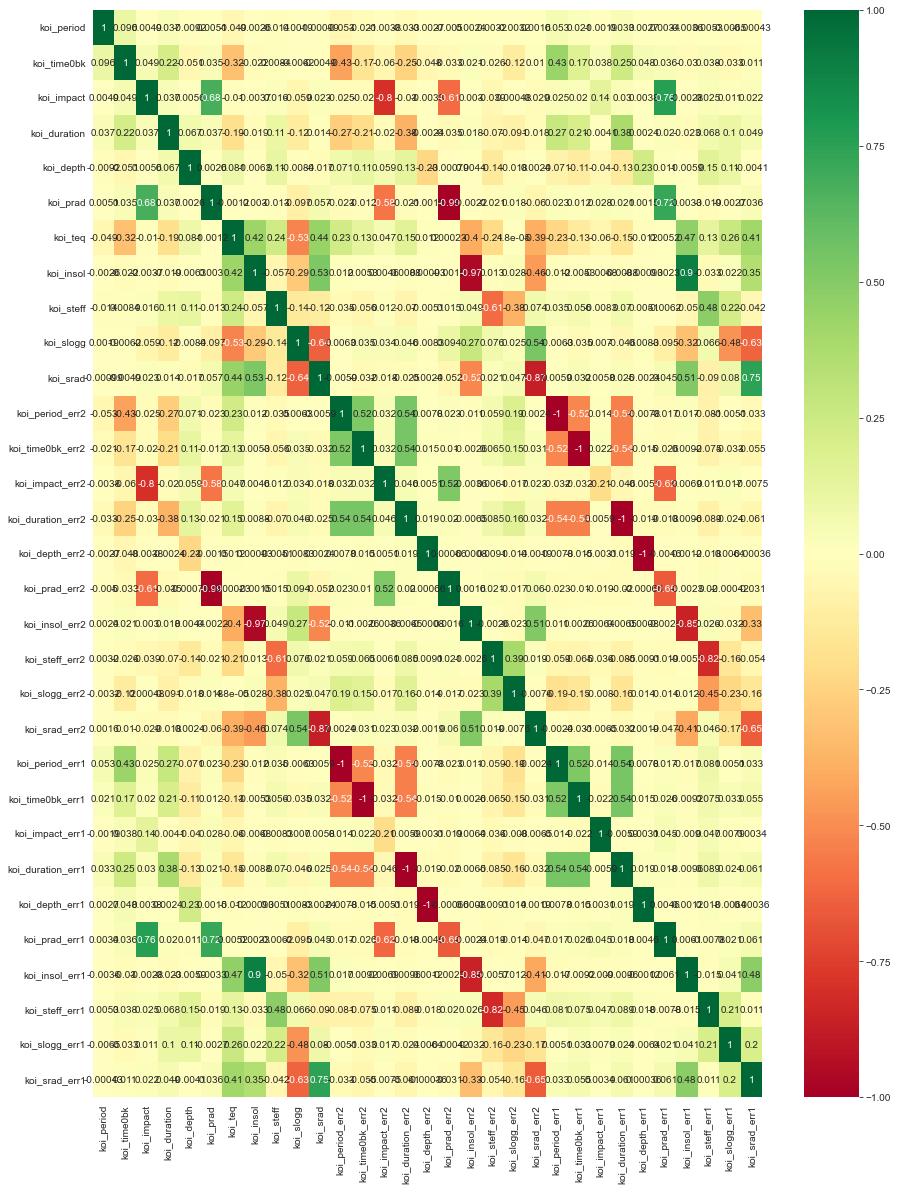

In [157]:
Selected_features = ['koi_period','koi_time0bk','koi_impact','koi_duration','koi_depth','koi_prad','koi_teq' ,
                     'koi_insol','koi_steff','koi_slogg' ,'koi_srad','koi_period_err2', 'koi_time0bk_err2', 
                     'koi_impact_err2','koi_duration_err2', 'koi_depth_err2', 'koi_prad_err2',
                     'koi_insol_err2', 'koi_steff_err2', 'koi_slogg_err2', 'koi_srad_err2','koi_period_err1',
                     'koi_time0bk_err1', 'koi_impact_err1',
                     'koi_duration_err1', 'koi_depth_err1', 'koi_prad_err1',
                     'koi_insol_err1', 'koi_steff_err1', 'koi_slogg_err1', 'koi_srad_err1']

X = df[Selected_features]

plt.subplots(figsize=(15,20))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

* The err1, err2 is the Uncertainties Columns upper(positive +) and lower(negative -) Transit Properties(Parameters) 
* Scaled planetary parameters combine the dimensionless fit parameters with physical stellar parameters to produce planet characteristics in physical units.
* There is alot of correlation so droping those err1 and err2  

In [158]:
droplist1

Index(['koi_period_err1', 'koi_time0bk_err1', 'koi_impact_err1',
       'koi_duration_err1', 'koi_depth_err1', 'koi_prad_err1',
       'koi_insol_err1', 'koi_steff_err1', 'koi_slogg_err1', 'koi_srad_err1'],
      dtype='object')

In [159]:
df.drop(['koi_period_err1', 'koi_time0bk_err1', 'koi_impact_err1',
       'koi_duration_err1', 'koi_depth_err1', 'koi_prad_err1',
       'koi_insol_err1', 'koi_steff_err1', 'koi_slogg_err1', 'koi_srad_err1'], axis=1,inplace=True)

In [160]:
droplist

Index(['koi_period_err2', 'koi_time0bk_err2', 'koi_impact_err2',
       'koi_duration_err2', 'koi_depth_err2', 'koi_prad_err2',
       'koi_insol_err2', 'koi_steff_err2', 'koi_slogg_err2', 'koi_srad_err2'],
      dtype='object')

In [161]:
df.drop(['koi_period_err2', 'koi_time0bk_err2', 'koi_impact_err2',
       'koi_duration_err2', 'koi_depth_err2', 'koi_prad_err2',
       'koi_insol_err2', 'koi_steff_err2', 'koi_slogg_err2', 'koi_srad_err2'], axis=1,inplace=True)

In [162]:
nullcols = df.isnull().sum()
nullcols[nullcols>0]

koi_score            1510
koi_impact            363
koi_depth             363
koi_prad              363
koi_teq               363
koi_insol             321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_slogg             363
koi_srad              363
dtype: int64

In [163]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

In [164]:
numeric_cols

['koi_score',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_time0bk',
 'koi_impact',
 'koi_duration',
 'koi_depth',
 'koi_prad',
 'koi_teq',
 'koi_insol',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_slogg',
 'koi_srad',
 'ra',
 'dec',
 'koi_kepmag']

In [165]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [166]:
imputer.fit(df[numeric_cols])

SimpleImputer(strategy='median')

In [167]:
list(imputer.statistics_)

[0.334,
 0.0,
 0.0,
 0.0,
 0.0,
 9.75283067,
 137.22459500000002,
 0.537,
 3.7926,
 421.1,
 2.39,
 878.0,
 141.6,
 23.0,
 1.0,
 5767.0,
 4.438,
 1.0,
 292.261125,
 43.6775035,
 14.52]

Next step is to transform all the Null values to mean values

In [168]:
df[numeric_cols] = imputer.transform(df[numeric_cols])

In [170]:
df.isnull().sum()

kepoi_name             0
koi_disposition        0
koi_pdisposition       0
koi_score              0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_time0bk            0
koi_impact             0
koi_duration           0
koi_depth              0
koi_prad               0
koi_teq                0
koi_insol              0
koi_model_snr          0
koi_tce_plnt_num       0
koi_tce_delivname    346
koi_steff              0
koi_slogg              0
koi_srad               0
ra                     0
dec                    0
koi_kepmag             0
dtype: int64

In [171]:
df.koi_tce_delivname.unique()

array(['q1_q17_dr25_tce', 'q1_q16_tce', nan, 'q1_q17_dr24_tce'],
      dtype=object)

In [172]:
df.koi_tce_delivname.value_counts()

q1_q17_dr25_tce    8054
q1_q16_tce          796
q1_q17_dr24_tce     368
Name: koi_tce_delivname, dtype: int64

In [173]:
df

,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,K00752.01,CONFIRMED,CANDIDATE,1.000,0.0,0.0,0.0,0.0,9.488036,170.538750,...,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,K00752.02,CONFIRMED,CANDIDATE,0.969,0.0,0.0,0.0,0.0,54.418383,162.513840,...,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,K00753.01,CANDIDATE,CANDIDATE,0.000,0.0,0.0,0.0,0.0,19.899140,175.850252,...,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0.0,1.0,0.0,0.0,1.736952,170.307565,...,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,K00755.01,CONFIRMED,CANDIDATE,1.000,0.0,0.0,0.0,0.0,2.525592,171.595550,...,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,K07985.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0.0,1.0,1.0,0.0,0.527699,131.705093,...,4500.53,453.3,1.0,q1_q17_dr25_tce,5638.0,4.529,0.903,297.18875,47.093819,14.082
9560,K07986.01,CANDIDATE,CANDIDATE,0.497,0.0,0.0,0.0,0.0,1.739849,133.001270,...,1585.81,10.6,1.0,q1_q17_dr25_tce,6119.0,4.444,1.031,286.50937,47.163219,14.757
9561,K07987.01,FALSE POSITIVE,FALSE POSITIVE,0.021,0.0,0.0,1.0,0.0,0.681402,132.181750,...,5713.41,12.3,1.0,q1_q17_dr25_tce,6173.0,4.447,1.041,294.16489,47.176281,15.385
9562,K07988.01,CANDIDATE,CANDIDATE,0.092,0.0,0.0,0.0,0.0,333.486169,153.615010,...,22.68,14.0,1.0,q1_q17_dr25_tce,4989.0,2.992,7.824,296.76288,47.145142,10.998


# Continuous Feature 

In [175]:
continuous_feature=[feature for feature in numeric_cols if feature ]
print("Continuous feature Count {}".format(len(continuous_feature)))

continuous_feature

Continuous feature Count 21


['koi_score',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_time0bk',
 'koi_impact',
 'koi_duration',
 'koi_depth',
 'koi_prad',
 'koi_teq',
 'koi_insol',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_slogg',
 'koi_srad',
 'ra',
 'dec',
 'koi_kepmag']

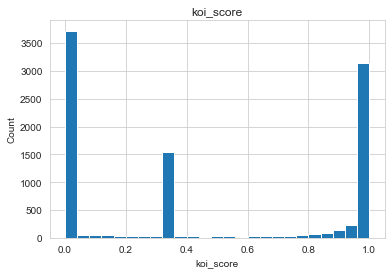

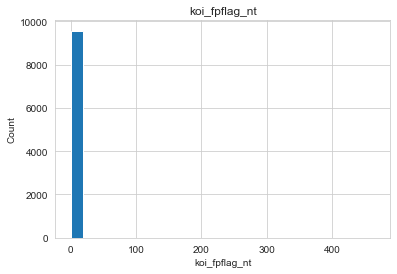

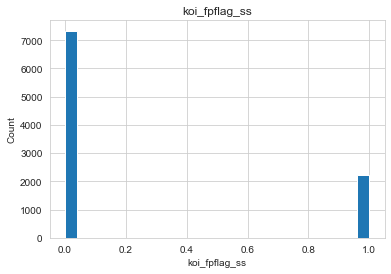

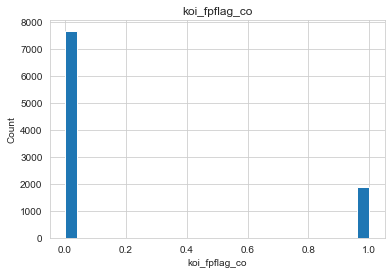

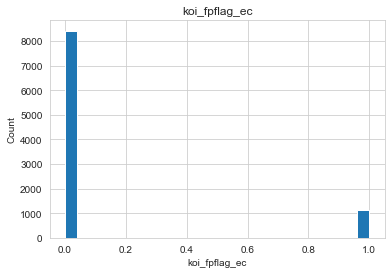

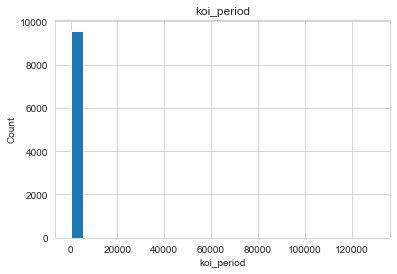

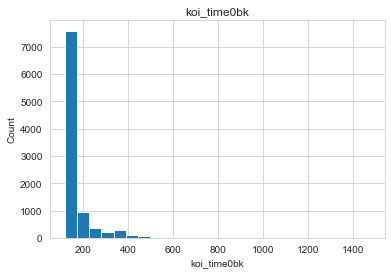

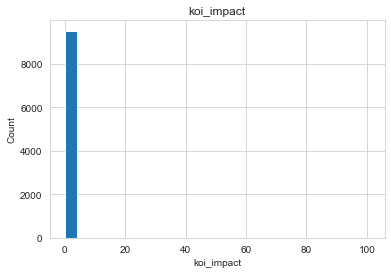

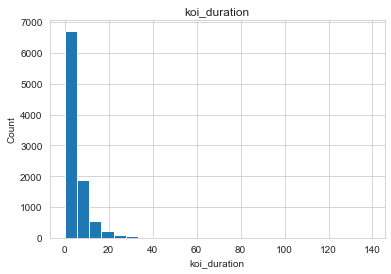

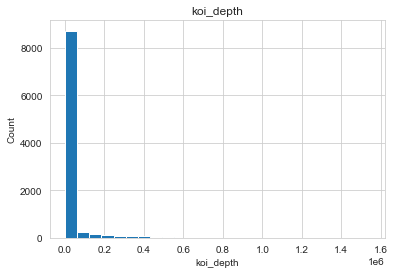

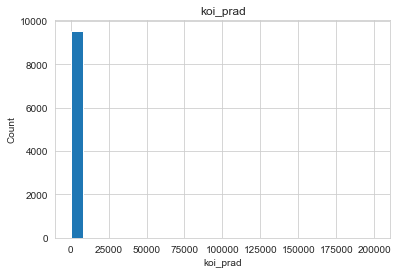

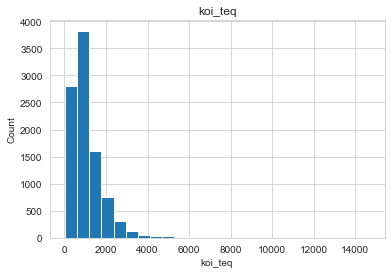

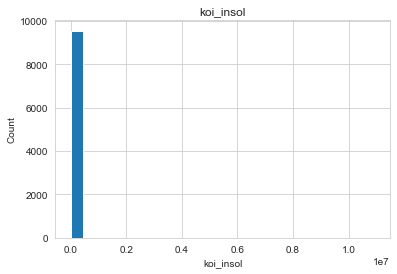

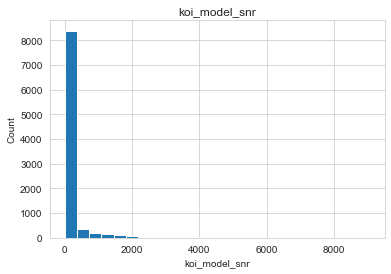

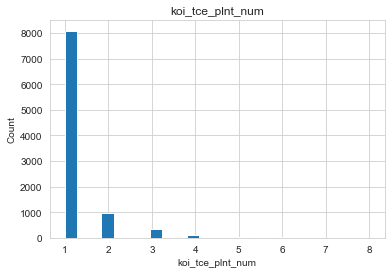

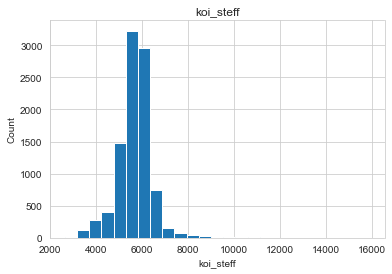

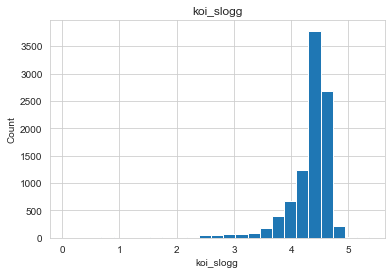

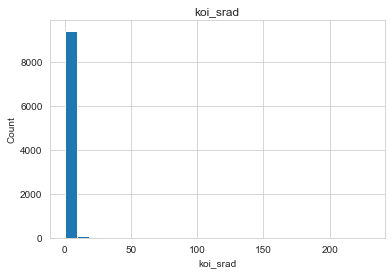

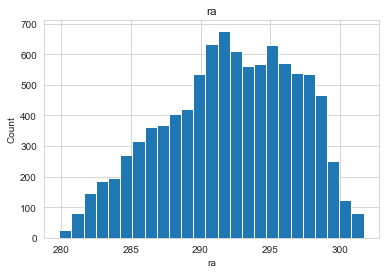

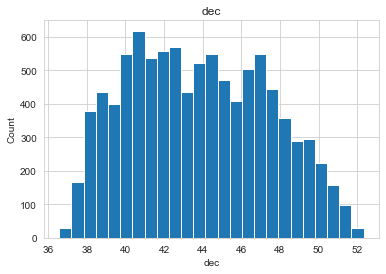

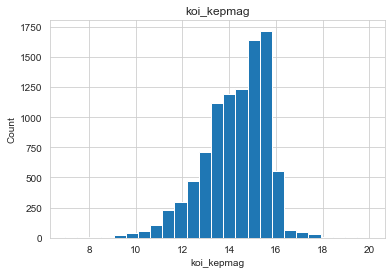

In [177]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# outliers

In [180]:
features =['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 
           'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact',
           'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
           'koi_slogg', 'koi_srad', 'koi_kepmag']

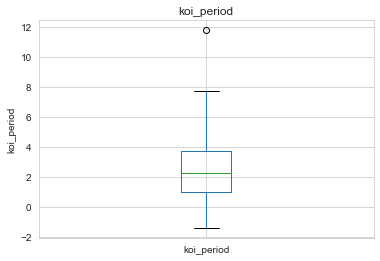

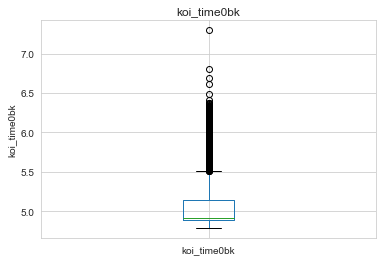

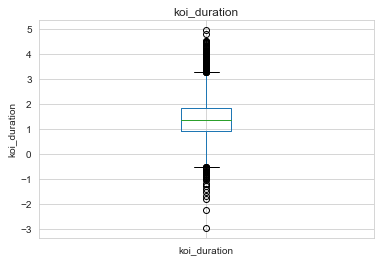

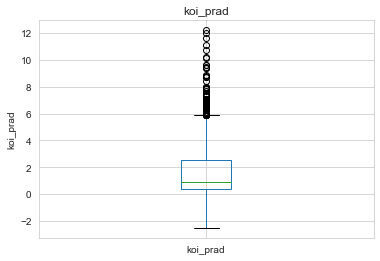

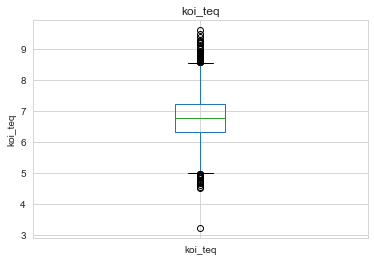

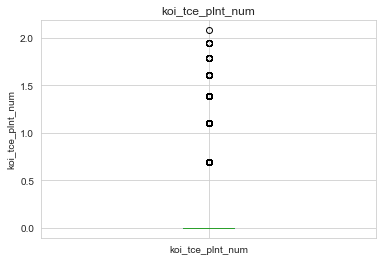

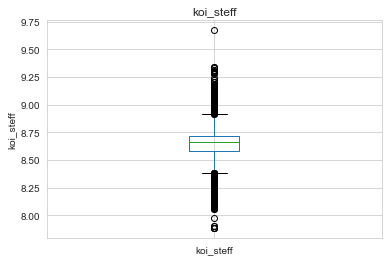

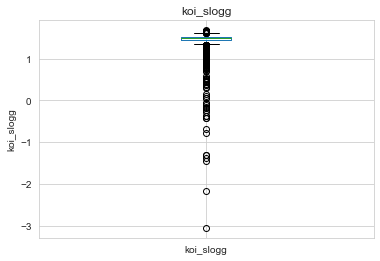

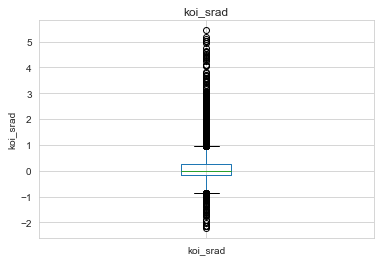

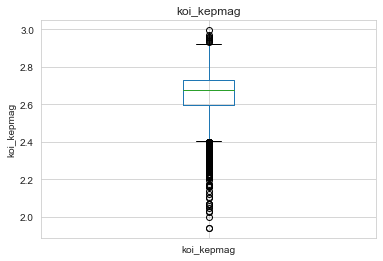

In [181]:
for feature in features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [182]:
def outliers(df, features):
    """Count the number of outliers for each feature using the IQR"""
    num_outliers = []
    pct_outliers = []
    total_rows = []
    interquartile_range = []
    for i in features:
        Q1 = df[i].quantile(.25)
        Q3 = df[i].quantile(.75)
        IQR = Q3 - Q1
        outliers = len(df[(df[i] < (Q1-1.5*IQR)) | (df[i] > (Q3+1.5*IQR))])
        rows = len(df[i])
        pct = outliers/rows
        interquartile_range.append(IQR)
        num_outliers.append(outliers)
        pct_outliers.append(pct)
        total_rows.append(rows)
        
    count_outliers = pd.DataFrame({'Feature': features, 'Num_Outliers': num_outliers, 'Percent_Outliers': pct_outliers, 'IQR': interquartile_range
                                   , 'Total_Rows': total_rows}).sort_values('Percent_Outliers', ascending=False)
    return count_outliers

count_outliers = outliers(df = df, features = features)
count_outliers

,Feature,Num_Outliers,Percent_Outliers,IQR,Total_Rows
2,koi_fpflag_ss,2226,0.232748,0.000000,9564
3,koi_fpflag_co,1889,0.197512,0.000000,9564
9,koi_depth,1834,0.191761,1174.975000,9564
13,koi_model_snr,1673,0.174927,58.825000,9564
10,koi_prad,1618,0.169176,11.682500,9564
5,koi_period,1567,0.163844,37.981493,9564
1,koi_fpflag_nt,1531,0.160079,0.000000,9564
12,koi_insol,1509,0.157779,784.637500,9564
14,koi_tce_plnt_num,1473,0.154015,0.000000,9564
4,koi_fpflag_ec,1148,0.120033,0.000000,9564


# Treating the outliers 

## koi_period

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_period')

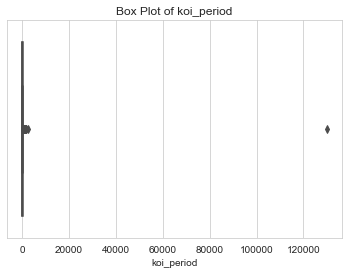

In [183]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_period, color = 'r')
plt.title('Box Plot of koi_period')

In [184]:
IQR = df.koi_period.quantile(.75) - df.koi_period.quantile(.25)
IQR

37.981493403250006

In [185]:
IQR = df.koi_period.quantile(0.75)- df.koi_period.quantile(0.25)
upper_limit = df.koi_period.quantile(0.75) + (1.5*IQR)
lower_limit = df.koi_period.quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

97.68741770487502 -54.238555908125015


In [186]:
df.koi_period = np.where(df.koi_period > upper_limit,upper_limit,df.koi_period)
df.koi_period = np.where(df.koi_period < lower_limit,lower_limit,df.koi_period)

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='koi_period'>

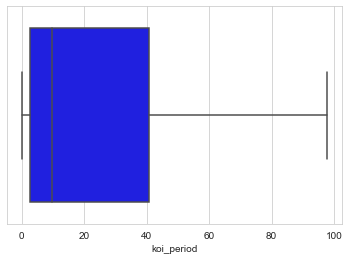

In [188]:
sns.boxplot(df.koi_period, color = 'blue')

## koi_time0bk

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_time0bk')

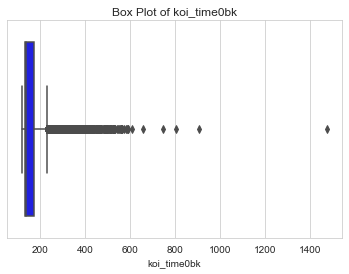

In [189]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_time0bk, color = 'b')
plt.title('Box Plot of koi_time0bk')

In [190]:
IQR = df.koi_time0bk.quantile(.75) - df.koi_time0bk.quantile(.25)
IQR

37.932885999999996

In [191]:
IQR = df.koi_time0bk.quantile(0.75)- df.koi_time0bk.quantile(0.25)
upper_limit = df.koi_time0bk.quantile(0.75) + (1.5*IQR)
lower_limit = df.koi_time0bk.quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

227.5939325 75.86238850000001


In [192]:
df.koi_time0bk = np.where(df.koi_time0bk > upper_limit,upper_limit,df.koi_time0bk)
df.koi_time0bk = np.where(df.koi_time0bk < lower_limit,lower_limit,df.koi_time0bk)

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_time0bk')

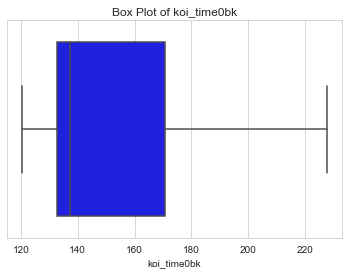

In [194]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_time0bk, color = 'b')
plt.title('Box Plot of koi_time0bk')

## koi_duration

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_duration')

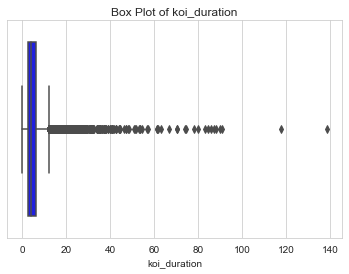

In [195]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_duration, color = 'b')
plt.title('Box Plot of koi_duration')

In [196]:
IQR = df.koi_duration.quantile(.75) - df.koi_duration.quantile(.25)
IQR

3.838749999999999

In [197]:
IQR = df.koi_duration.quantile(0.75)- df.koi_duration.quantile(0.25)
upper_limit = df.koi_duration.quantile(0.75) + (1.5*IQR)
lower_limit = df.koi_duration.quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

12.034624999999998 -3.3203749999999985


In [198]:
df.koi_duration = np.where(df.koi_duration > upper_limit,upper_limit,df.koi_duration)
df.koi_duration = np.where(df.koi_duration < lower_limit,lower_limit,df.koi_duration)

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_duration')

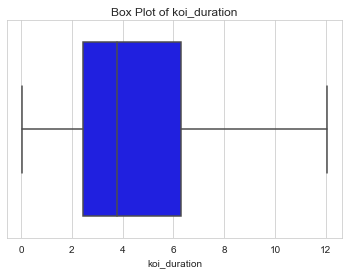

In [199]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_duration, color = 'b')
plt.title('Box Plot of koi_duration')

## koi_prad

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_prad')

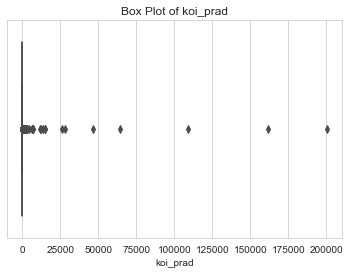

In [200]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_prad, color = 'b')
plt.title('Box Plot of koi_prad')

In [201]:
IQR = df.koi_prad.quantile(.75) - df.koi_prad.quantile(.25)
IQR

11.6825

In [202]:
IQR = df.koi_prad.quantile(0.75)- df.koi_prad.quantile(0.25)
upper_limit = df.koi_prad.quantile(0.75) + (1.5*IQR)
lower_limit = df.koi_prad.quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

30.636249999999997 -16.09375


In [203]:
df.koi_prad = np.where(df.koi_prad > upper_limit,upper_limit,df.koi_prad)
df.koi_prad = np.where(df.koi_prad < lower_limit,lower_limit,df.koi_prad)

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_prad')

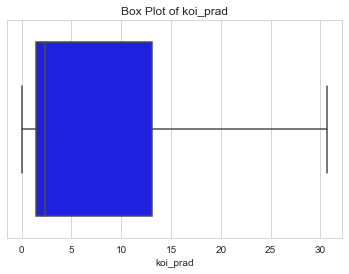

In [204]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_prad, color = 'b')
plt.title('Box Plot of koi_prad')

## koi_teq

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_teq')

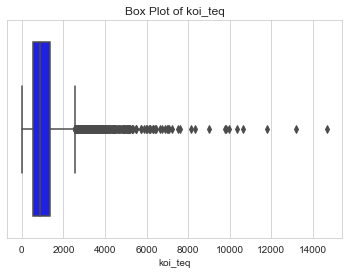

In [205]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_teq, color = 'b')
plt.title('Box Plot of koi_teq')

In [206]:
IQR = df.koi_teq.quantile(.75) - df.koi_teq.quantile(.25)
IQR

799.5

In [207]:
IQR = df.koi_teq.quantile(0.75)- df.koi_teq.quantile(0.25)
upper_limit = df.koi_teq.quantile(0.75) + (1.5*IQR)
lower_limit = df.koi_teq.quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

2551.75 -646.25


In [208]:
df.koi_teq = np.where(df.koi_teq > upper_limit,upper_limit,df.koi_teq)
df.koi_teq = np.where(df.koi_teq < lower_limit,lower_limit,df.koi_teq)

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_teq')

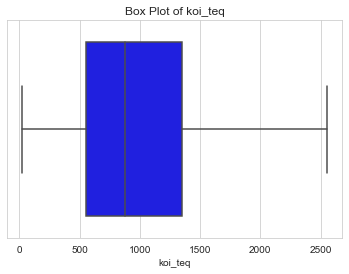

In [209]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_teq, color = 'b')
plt.title('Box Plot of koi_teq')

## koi_tce_plnt_num

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_tce_plnt_num')

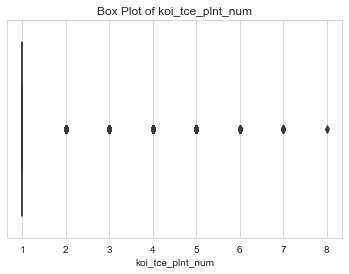

In [210]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_tce_plnt_num, color = 'y')
plt.title('Box Plot of koi_tce_plnt_num')

## koi_steff

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_steff')

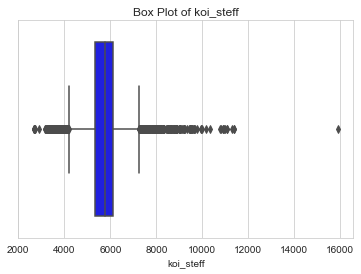

In [211]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_steff, color = 'b')
plt.title('Box Plot of koi_steff')

In [212]:
IQR = df.koi_steff.quantile(.75) - df.koi_steff.quantile(.25)
IQR

766.0

In [213]:
IQR = df.koi_steff.quantile(0.75)- df.koi_steff.quantile(0.25)
upper_limit = df.koi_steff.quantile(0.75) + (1.5*IQR)
lower_limit = df.koi_steff.quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

7248.0 4184.0


In [214]:
df.koi_steff = np.where(df.koi_steff > upper_limit,upper_limit,df.koi_steff)
df.koi_steff = np.where(df.koi_steff < lower_limit,lower_limit,df.koi_steff)

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_steff')

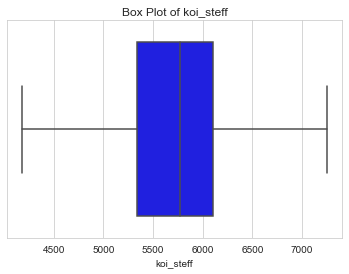

In [215]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_steff, color = 'b')
plt.title('Box Plot of koi_steff')

## koi_slogg

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_slogg')

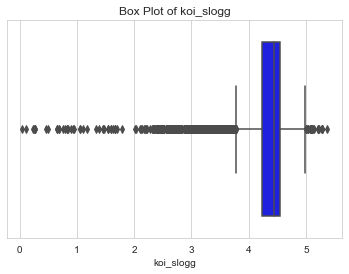

In [216]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_slogg, color = 'b')
plt.title('Box Plot of koi_slogg')

In [217]:
IQR = df.koi_slogg.quantile(.75) - df.koi_slogg.quantile(.25)
IQR

0.30625000000000036

In [218]:
IQR = df.koi_slogg.quantile(0.75)- df.koi_slogg.quantile(0.25)
upper_limit = df.koi_slogg.quantile(0.75) + (1.5*IQR)
lower_limit = df.koi_slogg.quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

4.998375 3.773374999999999


In [219]:
df.koi_slogg = np.where(df.koi_slogg > upper_limit,upper_limit,df.koi_slogg)
df.koi_slogg = np.where(df.koi_slogg < lower_limit,lower_limit,df.koi_slogg)

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_slogg')

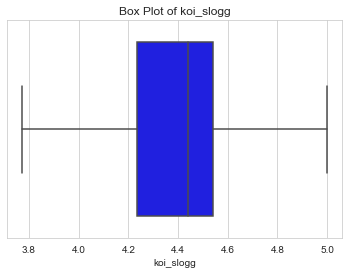

In [220]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_slogg, color = 'b')
plt.title('Box Plot of koi_slogg')

## koi_srad

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_srad')

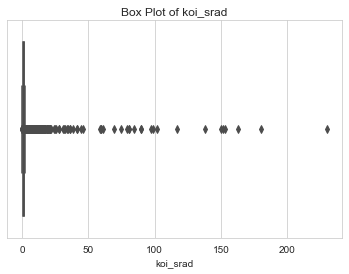

In [221]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_srad, color = 'b')
plt.title('Box Plot of koi_srad')

In [222]:
IQR = df.koi_srad.quantile(.75) - df.koi_srad.quantile(.25)
IQR

0.47724999999999995

In [223]:
IQR = df.koi_srad.quantile(0.75)- df.koi_srad.quantile(0.25)
upper_limit = df.koi_srad.quantile(0.75) + (1.5*IQR)
lower_limit = df.koi_srad.quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

2.0288749999999998 0.11987500000000006


In [224]:
df.koi_srad = np.where(df.koi_srad > upper_limit,upper_limit,df.koi_srad)
df.koi_srad = np.where(df.koi_srad < lower_limit,lower_limit,df.koi_srad)

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_srad')

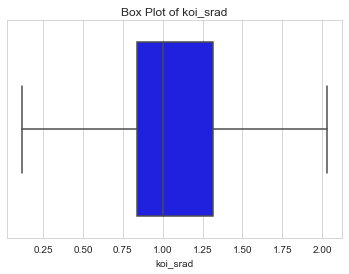

In [225]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_srad, color = 'b')
plt.title('Box Plot of koi_srad')

## koi_kepmag

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_kepmag')

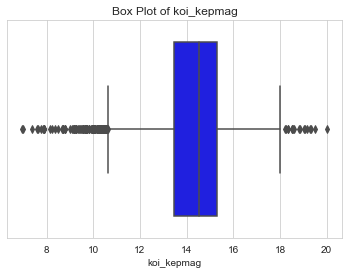

In [226]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_kepmag, color = 'b')
plt.title('Box Plot of koi_kepmag')

In [227]:
IQR = df.koi_kepmag.quantile(.75) - df.koi_kepmag.quantile(.25)
IQR

1.8819999999999997

In [228]:
IQR = df.koi_kepmag.quantile(0.75)- df.koi_kepmag.quantile(0.25)
upper_limit = df.koi_kepmag.quantile(0.75) + (1.5*IQR)
lower_limit = df.koi_kepmag.quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

18.145 10.617


In [229]:
df.koi_kepmag = np.where(df.koi_kepmag > upper_limit,upper_limit,df.koi_kepmag)
df.koi_kepmag = np.where(df.koi_kepmag < lower_limit,lower_limit,df.koi_kepmag)

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of koi_kepmag')

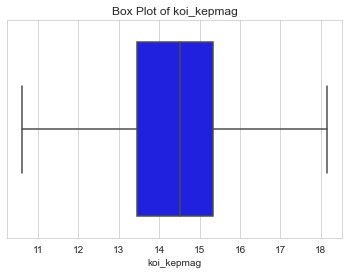

In [230]:
sns.set_style('whitegrid')
sns.boxplot(df.koi_kepmag, color = 'b')
plt.title('Box Plot of koi_kepmag')

# Categorical Feature 

In [231]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
print("categorical features count {} ".format(len(categorical_features)))
categorical_features

categorical features count 4 


['kepoi_name', 'koi_disposition', 'koi_pdisposition', 'koi_tce_delivname']

In [232]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is kepoi_name and number of categories are 9564
The feature is koi_disposition and number of categories are 3
The feature is koi_pdisposition and number of categories are 2
The feature is koi_tce_delivname and number of categories are 4


Value counts of the kepoi_name column is
 K00752.01    1
K04976.01    1
K04978.01    1
K04979.01    1
K04980.01    1
            ..
K00552.01    1
K00601.01    1
K00601.02    1
K00601.03    1
K07989.01    1
Name: kepoi_name, Length: 9564, dtype: int64


D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


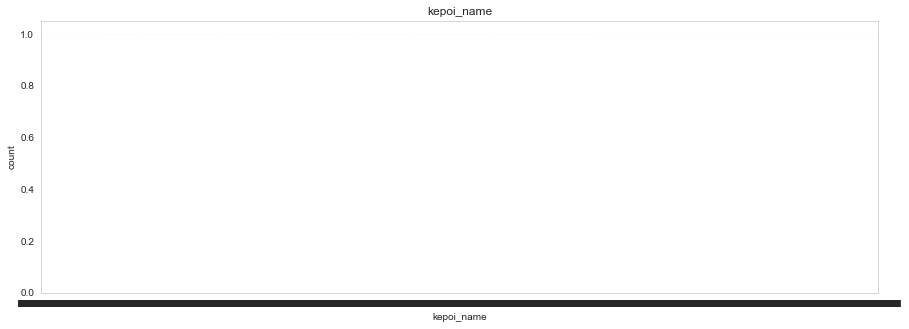

Value counts of the koi_disposition column is
 FALSE POSITIVE    4840
CANDIDATE         2366
CONFIRMED         2358
Name: koi_disposition, dtype: int64


D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


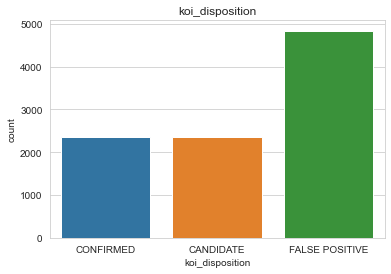

Value counts of the koi_pdisposition column is
 FALSE POSITIVE    4847
CANDIDATE         4717
Name: koi_pdisposition, dtype: int64


D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


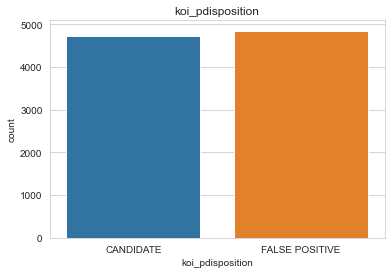

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Value counts of the koi_tce_delivname column is
 q1_q17_dr25_tce    8054
q1_q16_tce          796
q1_q17_dr24_tce     368
Name: koi_tce_delivname, dtype: int64


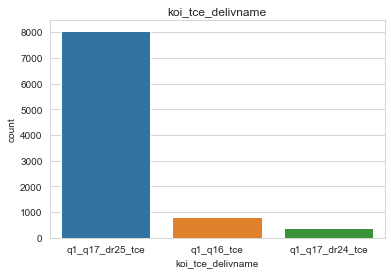

In [233]:
plt.figure(figsize = (15, 5))

for feature in categorical_features:
    print('Value counts of the {0} column is\n {1}'.format(feature, df[feature].value_counts()))
    sns.countplot(df[feature])
    plt.title(feature)
    plt.show()

FALSE POSITIVE    4840
CANDIDATE         2366
CONFIRMED         2358
Name: koi_disposition, dtype: int64

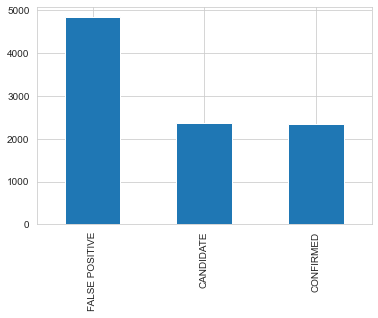

In [235]:
df['koi_disposition'].value_counts().plot(kind = 'bar')
df['koi_disposition'].value_counts()

In [236]:
df.describe()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,...,9564.000000,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000
mean,0.457647,0.208595,0.232748,0.197512,0.120033,28.209430,154.779769,0.727586,4.841954,2.290432e+04,...,1026.311637,7.490517e+03,250.903691,1.234839,5700.771644,4.358883,1.129717,292.060163,43.810433,14.276929
std,0.440921,4.767290,0.422605,0.398142,0.325018,35.539130,31.861336,3.284876,3.252243,8.079020e+04,...,627.129609,1.565158e+05,781.868222,0.654024,647.930473,0.262971,0.434656,4.766657,3.601243,1.336585
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,0.000000,0.052000,0.000000e+00,...,25.000000,0.000000e+00,0.000000,1.000000,4184.000000,3.773375,0.119875,279.852720,36.577381,10.617000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,0.209075,2.437750,1.668000e+02,...,553.000000,2.216000e+01,12.300000,1.000000,5333.000000,4.232750,0.835750,288.660770,40.777173,13.440000
50%,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,0.537000,3.792600,4.211000e+02,...,878.000000,1.416000e+02,23.000000,1.000000,5767.000000,4.438000,1.000000,292.261125,43.677504,14.520000
75%,0.995000,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,0.877000,6.276500,1.341775e+03,...,1352.500000,8.067975e+02,71.125000,1.000000,6099.000000,4.539000,1.313000,295.859160,46.714611,15.322000
max,1.000000,465.000000,1.000000,1.000000,1.000000,97.687418,227.593932,100.806000,12.034625,1.541400e+06,...,2551.750000,1.094755e+07,9054.700000,8.000000,7248.000000,4.998375,2.028875,301.720760,52.336010,18.145000


In [237]:
df.koi_disposition.describe()

count               9564
unique                 3
top       FALSE POSITIVE
freq                4840
Name: koi_disposition, dtype: object

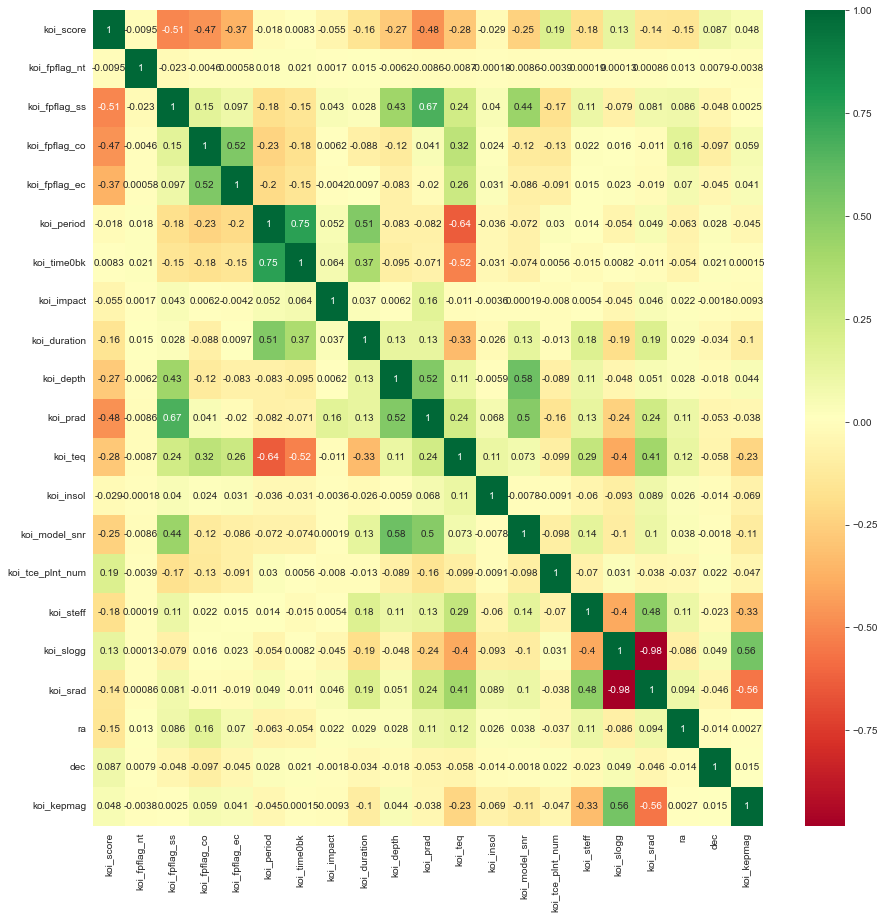

In [238]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [239]:
df

,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,K00752.01,CONFIRMED,CANDIDATE,1.000,0.0,0.0,0.0,0.0,9.488036,170.538750,...,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467000,0.927000,291.93423,48.141651,15.347
1,K00752.02,CONFIRMED,CANDIDATE,0.969,0.0,0.0,0.0,0.0,54.418383,162.513840,...,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467000,0.927000,291.93423,48.141651,15.347
2,K00753.01,CANDIDATE,CANDIDATE,0.000,0.0,0.0,0.0,0.0,19.899140,175.850252,...,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544000,0.868000,297.00482,48.134129,15.436
3,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0.0,1.0,0.0,0.0,1.736952,170.307565,...,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564000,0.791000,285.53461,48.285210,15.597
4,K00755.01,CONFIRMED,CANDIDATE,1.000,0.0,0.0,0.0,0.0,2.525592,171.595550,...,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438000,1.046000,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,K07985.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0.0,1.0,1.0,0.0,0.527699,131.705093,...,4500.53,453.3,1.0,q1_q17_dr25_tce,5638.0,4.529000,0.903000,297.18875,47.093819,14.082
9560,K07986.01,CANDIDATE,CANDIDATE,0.497,0.0,0.0,0.0,0.0,1.739849,133.001270,...,1585.81,10.6,1.0,q1_q17_dr25_tce,6119.0,4.444000,1.031000,286.50937,47.163219,14.757
9561,K07987.01,FALSE POSITIVE,FALSE POSITIVE,0.021,0.0,0.0,1.0,0.0,0.681402,132.181750,...,5713.41,12.3,1.0,q1_q17_dr25_tce,6173.0,4.447000,1.041000,294.16489,47.176281,15.385
9562,K07988.01,CANDIDATE,CANDIDATE,0.092,0.0,0.0,0.0,0.0,97.687418,153.615010,...,22.68,14.0,1.0,q1_q17_dr25_tce,4989.0,3.773375,2.028875,296.76288,47.145142,10.998


In [240]:
df1 = df

In [241]:
df1

,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,K00752.01,CONFIRMED,CANDIDATE,1.000,0.0,0.0,0.0,0.0,9.488036,170.538750,...,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467000,0.927000,291.93423,48.141651,15.347
1,K00752.02,CONFIRMED,CANDIDATE,0.969,0.0,0.0,0.0,0.0,54.418383,162.513840,...,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467000,0.927000,291.93423,48.141651,15.347
2,K00753.01,CANDIDATE,CANDIDATE,0.000,0.0,0.0,0.0,0.0,19.899140,175.850252,...,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544000,0.868000,297.00482,48.134129,15.436
3,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0.0,1.0,0.0,0.0,1.736952,170.307565,...,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564000,0.791000,285.53461,48.285210,15.597
4,K00755.01,CONFIRMED,CANDIDATE,1.000,0.0,0.0,0.0,0.0,2.525592,171.595550,...,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438000,1.046000,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,K07985.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0.0,1.0,1.0,0.0,0.527699,131.705093,...,4500.53,453.3,1.0,q1_q17_dr25_tce,5638.0,4.529000,0.903000,297.18875,47.093819,14.082
9560,K07986.01,CANDIDATE,CANDIDATE,0.497,0.0,0.0,0.0,0.0,1.739849,133.001270,...,1585.81,10.6,1.0,q1_q17_dr25_tce,6119.0,4.444000,1.031000,286.50937,47.163219,14.757
9561,K07987.01,FALSE POSITIVE,FALSE POSITIVE,0.021,0.0,0.0,1.0,0.0,0.681402,132.181750,...,5713.41,12.3,1.0,q1_q17_dr25_tce,6173.0,4.447000,1.041000,294.16489,47.176281,15.385
9562,K07988.01,CANDIDATE,CANDIDATE,0.092,0.0,0.0,0.0,0.0,97.687418,153.615010,...,22.68,14.0,1.0,q1_q17_dr25_tce,4989.0,3.773375,2.028875,296.76288,47.145142,10.998


In [243]:
#dropping

In [244]:
categorical_features

['kepoi_name', 'koi_disposition', 'koi_pdisposition', 'koi_tce_delivname']

In [250]:
df2 = df1.drop(['kepoi_name', 'koi_pdisposition', 'koi_tce_delivname'], axis = 1)

In [251]:
df2

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,1.000,0.0,0.0,0.0,0.0,9.488036,170.538750,0.146,2.95750,...,793.0,93.59,35.8,1.0,5455.0,4.467000,0.927000,291.93423,48.141651,15.347
1,CONFIRMED,0.969,0.0,0.0,0.0,0.0,54.418383,162.513840,0.586,4.50700,...,443.0,9.11,25.8,2.0,5455.0,4.467000,0.927000,291.93423,48.141651,15.347
2,CANDIDATE,0.000,0.0,0.0,0.0,0.0,19.899140,175.850252,0.969,1.78220,...,638.0,39.30,76.3,1.0,5853.0,4.544000,0.868000,297.00482,48.134129,15.436
3,FALSE POSITIVE,0.000,0.0,1.0,0.0,0.0,1.736952,170.307565,1.276,2.40641,...,1395.0,891.96,505.6,1.0,5805.0,4.564000,0.791000,285.53461,48.285210,15.597
4,CONFIRMED,1.000,0.0,0.0,0.0,0.0,2.525592,171.595550,0.701,1.65450,...,1406.0,926.16,40.9,1.0,6031.0,4.438000,1.046000,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0.000,0.0,1.0,1.0,0.0,0.527699,131.705093,1.252,3.22210,...,2088.0,4500.53,453.3,1.0,5638.0,4.529000,0.903000,297.18875,47.093819,14.082
9560,CANDIDATE,0.497,0.0,0.0,0.0,0.0,1.739849,133.001270,0.043,3.11400,...,1608.0,1585.81,10.6,1.0,6119.0,4.444000,1.031000,286.50937,47.163219,14.757
9561,FALSE POSITIVE,0.021,0.0,0.0,1.0,0.0,0.681402,132.181750,0.147,0.86500,...,2218.0,5713.41,12.3,1.0,6173.0,4.447000,1.041000,294.16489,47.176281,15.385
9562,CANDIDATE,0.092,0.0,0.0,0.0,0.0,97.687418,153.615010,0.214,3.19900,...,557.0,22.68,14.0,1.0,4989.0,3.773375,2.028875,296.76288,47.145142,10.998


In [267]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   9564 non-null   object 
 1   koi_score         9564 non-null   float64
 2   koi_fpflag_nt     9564 non-null   float64
 3   koi_fpflag_ss     9564 non-null   float64
 4   koi_fpflag_co     9564 non-null   float64
 5   koi_fpflag_ec     9564 non-null   float64
 6   koi_period        9564 non-null   float64
 7   koi_time0bk       9564 non-null   float64
 8   koi_impact        9564 non-null   float64
 9   koi_duration      9564 non-null   float64
 10  koi_depth         9564 non-null   float64
 11  koi_prad          9564 non-null   float64
 12  koi_teq           9564 non-null   float64
 13  koi_insol         9564 non-null   float64
 14  koi_model_snr     9564 non-null   float64
 15  koi_tce_plnt_num  9564 non-null   float64
 16  koi_steff         9564 non-null   float64


Text(0.5, 1.0, 'Countplot for the 3 KOI')

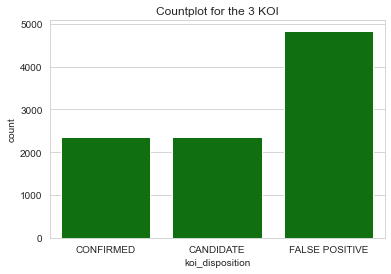

In [268]:
a = sns.countplot(x = 'koi_disposition', data = df2, color = 'Green')
a.set_title('Countplot for the 3 KOI')

In [270]:
X = df2.drop('koi_disposition', axis = 1)
y = df2['koi_disposition']

In [271]:
X.columns

Index(['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact',
       'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg',
       'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [272]:
cols = X.columns
cols

Index(['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact',
       'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg',
       'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [276]:
corr = X.corr()
corr.style.background_gradient('coolwarm')

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
koi_score,1.000000,-0.009455,-0.507504,-0.467607,-0.368493,-0.017649,0.008260,-0.054949,-0.158095,-0.272403,-0.476596,-0.280360,-0.029126,-0.246008,0.192702,-0.182314,0.127454,-0.138990,-0.152253,0.086986,0.048174
koi_fpflag_nt,-0.009455,1.000000,-0.023270,-0.004575,0.000576,0.018333,0.020695,0.001688,0.015117,-0.006158,-0.008606,-0.008739,-0.000176,-0.008642,-0.003874,0.000191,0.000134,0.000864,0.012693,0.007914,-0.003813
koi_fpflag_ss,-0.507504,-0.023270,1.000000,0.151233,0.096539,-0.182512,-0.148252,0.042776,0.028071,0.425804,0.672769,0.238440,0.039926,0.437451,-0.174319,0.108036,-0.079241,0.080718,0.086374,-0.048116,0.002539
koi_fpflag_co,-0.467607,-0.004575,0.151233,1.000000,0.523851,-0.234100,-0.177087,0.006215,-0.087723,-0.119699,0.041477,0.315272,0.023578,-0.121762,-0.126743,0.022405,0.016173,-0.010772,0.159923,-0.097175,0.059109
koi_fpflag_ec,-0.368493,0.000576,0.096539,0.523851,1.000000,-0.203599,-0.150466,-0.004249,0.009665,-0.082864,-0.019772,0.263666,0.030658,-0.085681,-0.090808,0.014554,0.023355,-0.019053,0.070498,-0.045119,0.041027
koi_period,-0.017649,0.018333,-0.182512,-0.234100,-0.203599,1.000000,0.753000,0.052426,0.513697,-0.082646,-0.082436,-0.639428,-0.036127,-0.071507,0.030059,0.013860,-0.053991,0.048830,-0.063421,0.027664,-0.044660
koi_time0bk,0.008260,0.020695,-0.148252,-0.177087,-0.150466,0.753000,1.000000,0.064182,0.374404,-0.095226,-0.070686,-0.519057,-0.031433,-0.074302,0.005614,-0.014612,0.008193,-0.011323,-0.054281,0.021241,0.000148
koi_impact,-0.054949,0.001688,0.042776,0.006215,-0.004249,0.052426,0.064182,1.000000,0.036691,0.006223,0.160542,-0.011460,-0.003574,0.000192,-0.007967,0.005406,-0.044569,0.045547,0.022037,-0.001806,-0.009251
koi_duration,-0.158095,0.015117,0.028071,-0.087723,0.009665,0.513697,0.374404,0.036691,1.000000,0.126547,0.132268,-0.332967,-0.026132,0.134313,-0.013483,0.183354,-0.186057,0.191587,0.028849,-0.034307,-0.104452
koi_depth,-0.272403,-0.006158,0.425804,-0.119699,-0.082864,-0.082646,-0.095226,0.006223,0.126547,1.000000,0.516246,0.109545,-0.005897,0.581068,-0.089476,0.108461,-0.047542,0.051154,0.028096,-0.017881,0.044162


<AxesSubplot:title={'center':' Correlation of Features'}>

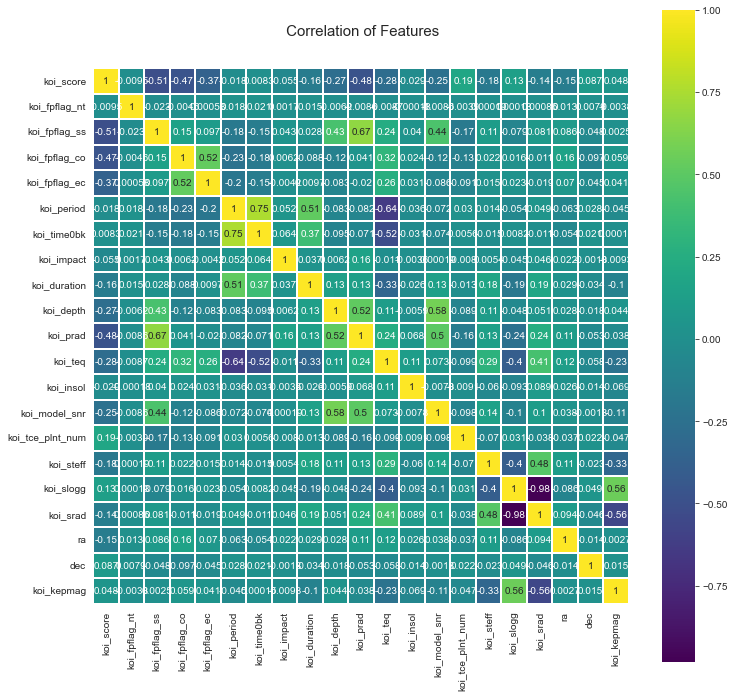

In [278]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title(' Correlation of Features', y=1.05, size=15)
sns.heatmap(X.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

As seen in the correlation plot, we can conclude

 koi_time0bk has a high correlation with koi_period
 
 koi_prad and koi_fpflag_ss have a high correlation
 
 We will try to train model after dropping the features of koi_time0bk 

In [280]:
X1 = X.drop(columns = ['koi_time0bk'], axis = 1)
y1 = df2['koi_disposition']
X1.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1.000,0.0,0.0,0.0,0.0,9.488036,0.146,2.95750,615.8,2.26000,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,0.969,0.0,0.0,0.0,0.0,54.418383,0.586,4.50700,874.8,2.83000,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,0.000,0.0,0.0,0.0,0.0,19.899140,0.969,1.78220,10829.0,14.60000,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,0.000,0.0,1.0,0.0,0.0,1.736952,1.276,2.40641,8079.2,30.63625,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,1.000,0.0,0.0,0.0,0.0,2.525592,0.701,1.65450,603.3,2.75000,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509


## Model Selection

In [281]:
from sklearn.model_selection import train_test_split

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [283]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

## Functions for Model Evaluation

In [284]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [289]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(3,3)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')
    y_pred = classifier.predict(X_test)
    yt_pred = classifier.predict(X_train)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y_train, yt_pred))
    print('The Testing Accuracy of the algorithm is ', accuracy_score(y_test, y_pred))
    return [(accuracy_score(y_train * 100, yt_pred * 100) * 100), (accuracy_score(y_test * 100, y_pred * 100) * 100)]

In [290]:
def model_evaluation1(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X1_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(3,3)
    sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt = '')
    y1_pred = classifier.predict(X1_test)
    yt1_pred = classifier.predict(X1_train)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y1_train, yt1_pred))
    print('The Testing Accuracy of the algorithm is ', accuracy_score(y1_test, y1_pred))
    return [(accuracy_score(y1_train, yt1_pred) * 100), (accuracy_score(y1_test, y1_pred) * 100)]

### Note

All the models here after will be evaluated on 2 datasets.

The first dataset is the one where no column is dropped and the confusion matrix will be plotted in Green Colour.

The secodn dataset is the one where some columns are dropped to try improve the accuracy and the confusion matrix for this data will be plotted in Blue Colour.

## K Nearest Neighbors

In [291]:
from sklearn.neighbors import KNeighborsClassifier

The Training Accuracy of the algorithm is  0.7027839498104823
The Testing Accuracy of the algorithm is  0.6445373758494511


[70.27839498104824, 64.45373758494512]

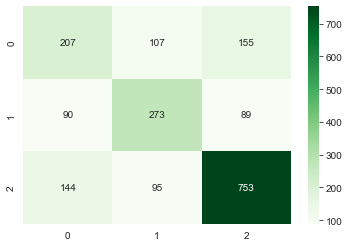

In [292]:
knn = KNeighborsClassifier(10, weights = 'uniform', metric = 'manhattan')
knn.fit(X_train, y_train)
model_evaluation(knn)

The Training Accuracy of the algorithm is  0.7004313161678212
The Testing Accuracy of the algorithm is  0.6466283324621014


[70.04313161678212, 64.66283324621014]

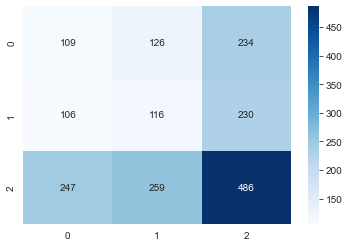

In [293]:
knn1 = KNeighborsClassifier(10, weights = 'uniform', metric = 'manhattan')
knn1.fit(X1_train, y1_train)
model_evaluation1(knn1)

## Support Vector Classifier

In [294]:
from sklearn.svm import SVC

The Training Accuracy of the algorithm is  0.6652725133969416
The Testing Accuracy of the algorithm is  0.6785154208050183


[66.52725133969416, 67.85154208050183]

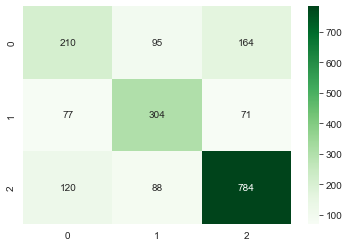

In [295]:
svc = SVC(C = 1E6)
svc.fit(X_train, y_train)
model_evaluation(svc)

The Training Accuracy of the algorithm is  0.6519409227551954
The Testing Accuracy of the algorithm is  0.6466283324621014


[65.19409227551954, 64.66283324621014]

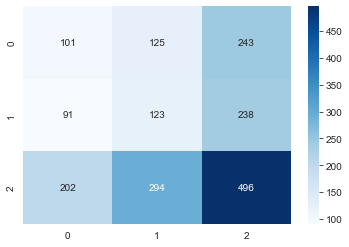

In [296]:
svc1 = SVC(C = 1E6)
svc1.fit(X1_train, y1_train)
model_evaluation1(svc1)

## Decision Tree Classifier

In [297]:
from sklearn.tree import DecisionTreeClassifier

The Training Accuracy of the algorithm is  0.8824990197359822
The Testing Accuracy of the algorithm is  0.8745426032409828


[88.24990197359823, 87.45426032409827]

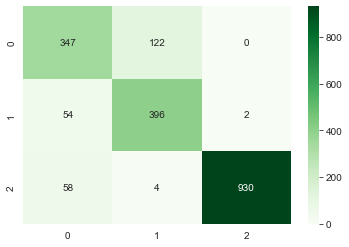

In [298]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
model_evaluation(dt)

The Training Accuracy of the algorithm is  0.8822376159979087
The Testing Accuracy of the algorithm is  0.8792472556194459


[88.22376159979088, 87.9247255619446]

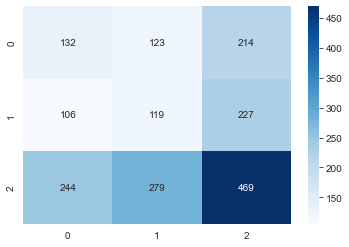

In [299]:
dt1 = DecisionTreeClassifier(max_depth = 5)
dt1.fit(X1_train, y1_train)
model_evaluation1(dt1)

## Random Forest Classifier

In [300]:
from sklearn.ensemble import RandomForestClassifier

The Training Accuracy of the algorithm is  0.8836753365573128
The Testing Accuracy of the algorithm is  0.8771562990067956


[88.36753365573128, 87.71562990067956]

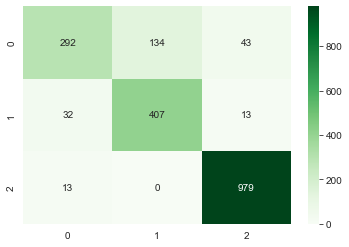

In [301]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
model_evaluation(rf)

The Training Accuracy of the algorithm is  0.8805384917004313
The Testing Accuracy of the algorithm is  0.8787245164662834


[88.05384917004314, 87.87245164662833]

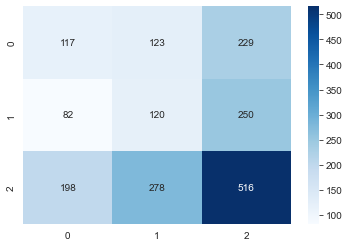

In [302]:
rf1 = RandomForestClassifier(max_depth = 4)
rf1.fit(X1_train, y1_train)
model_evaluation1(rf1)

## Gradient Boosting Classifier

In [303]:
from sklearn.ensemble import GradientBoostingClassifier

The Training Accuracy of the algorithm is  0.8594954907855182
The Testing Accuracy of the algorithm is  0.8588604286461056


[85.94954907855183, 85.88604286461056]

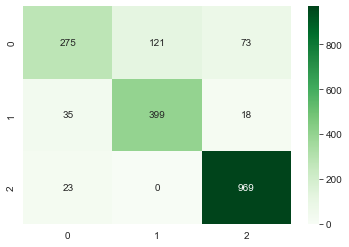

In [304]:
gbc = GradientBoostingClassifier(learning_rate = 0.005)
gbc.fit(X_train, y_train)
model_evaluation(gbc)

The Training Accuracy of the algorithm is  0.8589726833093714
The Testing Accuracy of the algorithm is  0.8609513852587559


[85.89726833093714, 86.0951385258756]

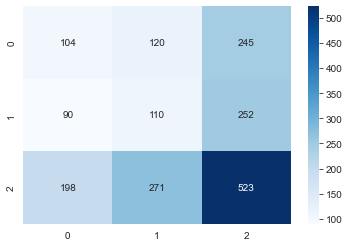

In [305]:
gbc1 = GradientBoostingClassifier(learning_rate = 0.005)
gbc1.fit(X1_train, y1_train)
model_evaluation1(gbc1)

In [306]:
results1 = pd.DataFrame(columns = ['Training Accuracy Base Model', 'Testing Accuracy Base Model'],index = ['K Nearest Neighbors', 
                                                                                    'Support Vector Machines', 'Decision Tree', 'Random Forest', 'Gradient Boost'])

The Training Accuracy of the algorithm is  0.7027839498104823
The Testing Accuracy of the algorithm is  0.6445373758494511
The Training Accuracy of the algorithm is  0.6652725133969416
The Testing Accuracy of the algorithm is  0.6785154208050183
The Training Accuracy of the algorithm is  0.8824990197359822
The Testing Accuracy of the algorithm is  0.8745426032409828
The Training Accuracy of the algorithm is  0.8836753365573128
The Testing Accuracy of the algorithm is  0.8771562990067956
The Training Accuracy of the algorithm is  0.8594954907855182
The Testing Accuracy of the algorithm is  0.8588604286461056


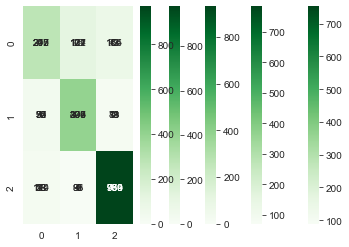

In [307]:
results1.loc['K Nearest Neighbors'] = model_evaluation(knn);
results1.loc['Support Vector Machines'] = model_evaluation(svc);
results1.loc['Decision Tree'] = model_evaluation(dt);
results1.loc['Random Forest'] = model_evaluation(rf);
results1.loc['Gradient Boost'] = model_evaluation(gbc);

In [309]:
results1

,Training Accuracy Base Model,Testing Accuracy Base Model
K Nearest Neighbors,70.278395,64.453738
Support Vector Machines,66.527251,67.851542
Decision Tree,88.249902,87.45426
Random Forest,88.367534,87.71563
Gradient Boost,85.949549,85.886043


In [310]:
results2 = pd.DataFrame(columns = ['Training Accuracy Dropped Columns', 'Testing Accuracy Dropped Columns'],index = ['K Nearest Neighbors', 
                                                                                    'Support Vector Machines', 'Decision Tree', 'Random Forest', 'Gradient Boost'])

The Training Accuracy of the algorithm is  0.7004313161678212
The Testing Accuracy of the algorithm is  0.6466283324621014
The Training Accuracy of the algorithm is  0.6519409227551954
The Testing Accuracy of the algorithm is  0.6466283324621014
The Training Accuracy of the algorithm is  0.8822376159979087
The Testing Accuracy of the algorithm is  0.8792472556194459
The Training Accuracy of the algorithm is  0.8805384917004313
The Testing Accuracy of the algorithm is  0.8787245164662834
The Training Accuracy of the algorithm is  0.8589726833093714
The Testing Accuracy of the algorithm is  0.8609513852587559


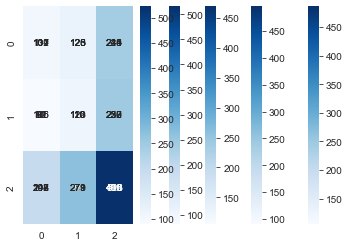

In [311]:
results2.loc['K Nearest Neighbors'] = model_evaluation1(knn1);
results2.loc['Support Vector Machines'] = model_evaluation1(svc1);
results2.loc['Decision Tree'] = model_evaluation1(dt1);
results2.loc['Random Forest'] = model_evaluation1(rf1);
results2.loc['Gradient Boost'] = model_evaluation1(gbc1);

In [313]:
results2

,Training Accuracy Dropped Columns,Testing Accuracy Dropped Columns
K Nearest Neighbors,70.043132,64.662833
Support Vector Machines,65.194092,64.662833
Decision Tree,88.223762,87.924726
Random Forest,88.053849,87.872452
Gradient Boost,85.897268,86.095139


In [312]:
results = pd.concat([results1, results2], join = 'outer', axis = 1)

# Results 

In [314]:
results

,Training Accuracy Base Model,Testing Accuracy Base Model,Training Accuracy Dropped Columns,Testing Accuracy Dropped Columns
K Nearest Neighbors,70.278395,64.453738,70.043132,64.662833
Support Vector Machines,66.527251,67.851542,65.194092,64.662833
Decision Tree,88.249902,87.45426,88.223762,87.924726
Random Forest,88.367534,87.71563,88.053849,87.872452
Gradient Boost,85.949549,85.886043,85.897268,86.095139


### Tuning Hyperparameters

In [316]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_model=RandomForestClassifier(random_state=1,n_estimators=300,class_weight='balanced',criterion='gini',
                    min_samples_leaf=5,
                       min_samples_split=10)
RandomForest_model.fit(X_train,y_train)
Ran_accuracy=RandomForest_model.score(X_test,y_test)
accuracy1 =RandomForest_model.score(X_train,y_train) 
print(Ran_accuracy,accuracy1)

0.9074751698902248 0.9567376813488433


In [317]:
Ran_Model = RandomForest_model.fit(X_train, y_train)

In [318]:
Ran_prd = RandomForest_model.predict(X_test)

In [319]:
pd.crosstab(y_test, Ran_prd, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,CANDIDATE,CONFIRMED,FALSE POSITIVE,All
Actual,,,,
CANDIDATE,365,98,6,469
CONFIRMED,47,400,5,452
FALSE POSITIVE,21,0,971,992
All,433,498,982,1913


In [320]:
confusion_matrix(y_test, Ran_prd)

array([[365,  98,   6],
       [ 47, 400,   5],
       [ 21,   0, 971]], dtype=int64)

In [324]:
from sklearn.metrics import classification_report

In [325]:
print(classification_report(y_test, Ran_prd))

                precision    recall  f1-score   support

     CANDIDATE       0.84      0.78      0.81       469
     CONFIRMED       0.80      0.88      0.84       452
FALSE POSITIVE       0.99      0.98      0.98       992

      accuracy                           0.91      1913
     macro avg       0.88      0.88      0.88      1913
  weighted avg       0.91      0.91      0.91      1913



# Conclusion

* I tried to improve accuracy by dropping columns, but it did not affect the accuracy much.
* I have achieved good accuracies with Decision Tree, Gradient Boost and Random Forest Algorithms 
* Among all other algorithms Random forest gives higher accuracy so I've chosen Random forest in this model.
* Random Forest tuning Hyperparameters we’ll be Looking at:
 max_depth,
 min_sample_split,
 max_leaf_nodes,
 min_samples_leaf,
 n_estimators,
 max_sample (bootstrap sample),
 max_features,
* I did consider other Algorithm like Decision Tree and Gradient Boost but I found it unsatisfactory
* After tuning Random Forest the Training accuracy 95.67, Testing accuracy 90.74
* Recall and F1_score are the metrics used to evaluate the model 